<a href="https://colab.research.google.com/github/Ronzy680/Social-Network-Analysis/blob/main/SGT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

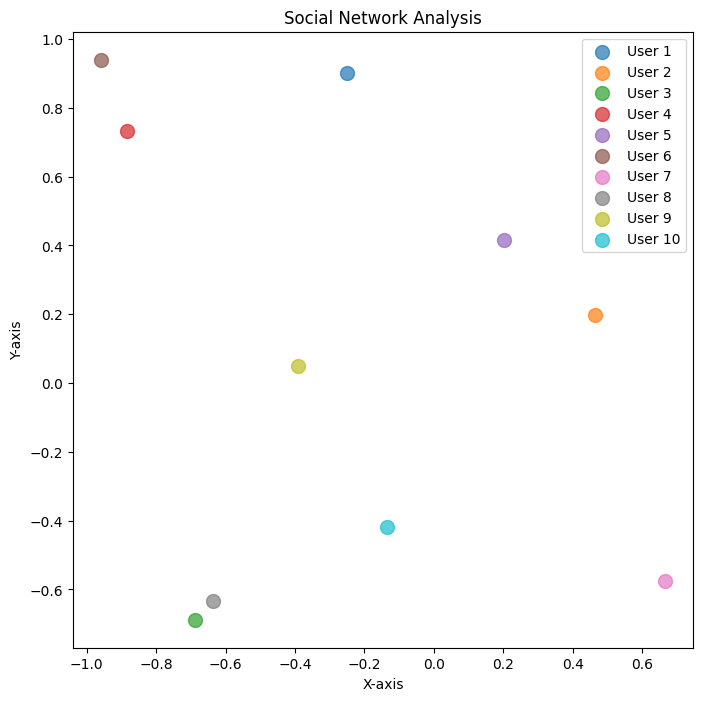

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def generate_social_network(num_nodes, seed=None):
    np.random.seed(seed)

    # Generate a fully connected network
    adjacency_matrix = np.ones((num_nodes, num_nodes)) - np.eye(num_nodes)

    return adjacency_matrix


def plot_social_network(adjacency_matrix, node_labels):
    num_nodes = adjacency_matrix.shape[0]

    plt.figure(figsize=(8, 8))
    plt.title("Social Network Analysis")

    # Adjust layout for better visualization
    layout = np.random.rand(num_nodes, 2) * 2 - 1

    # Plot nodes
    for i in range(num_nodes):
        plt.scatter(layout[i, 0], layout[i, 1], s=100, alpha=0.7, label=f"User {node_labels[i]}")

    # Connect nodes with edges that touch the nodes
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adjacency_matrix[i, j] == 1:
                # Calculate edge midpoint and offset vectors towards nodes
                midpoint = (layout[i] + layout[j]) / 2
                offset_i = (layout[i] - midpoint) * 0.1
                offset_j = (layout[j] - midpoint) * 0.1

                # Plot edge with slight adjustments to touch nodes
                plt.plot([midpoint[0] - offset_i[0], midpoint[0] + offset_j[0]],
                         [midpoint[1] - offset_i[1], midpoint[1] + offset_j[1]],
                         'k-', alpha=0.3)

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()


num_nodes = 10
seed = 42

# Generate a fully connected social network
social_network = generate_social_network(num_nodes, seed)

# Plot the social network with edges touching nodes
plot_social_network(social_network, range(1, num_nodes + 1))

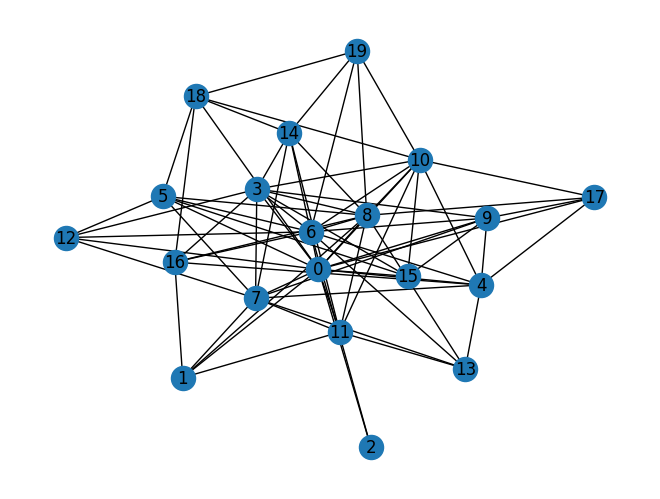

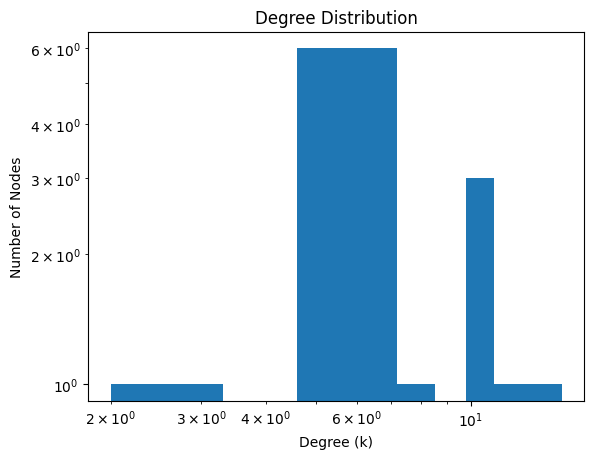

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree (k)")
    plt.ylabel("Number of Nodes")
    plt.title("Degree Distribution")
    plt.loglog()  # Plot on a log-log scale
    plt.show()

# Preferential attachment network generation
num_nodes = 20
m = 5  # Number of edges to attach from new nodes each step
G = nx.barabasi_albert_graph(num_nodes, m)

# Visualize the network (optional)
nx.draw(G, with_labels=True)
plt.show()

# Analyze the degree distribution
plot_degree_distribution(G)

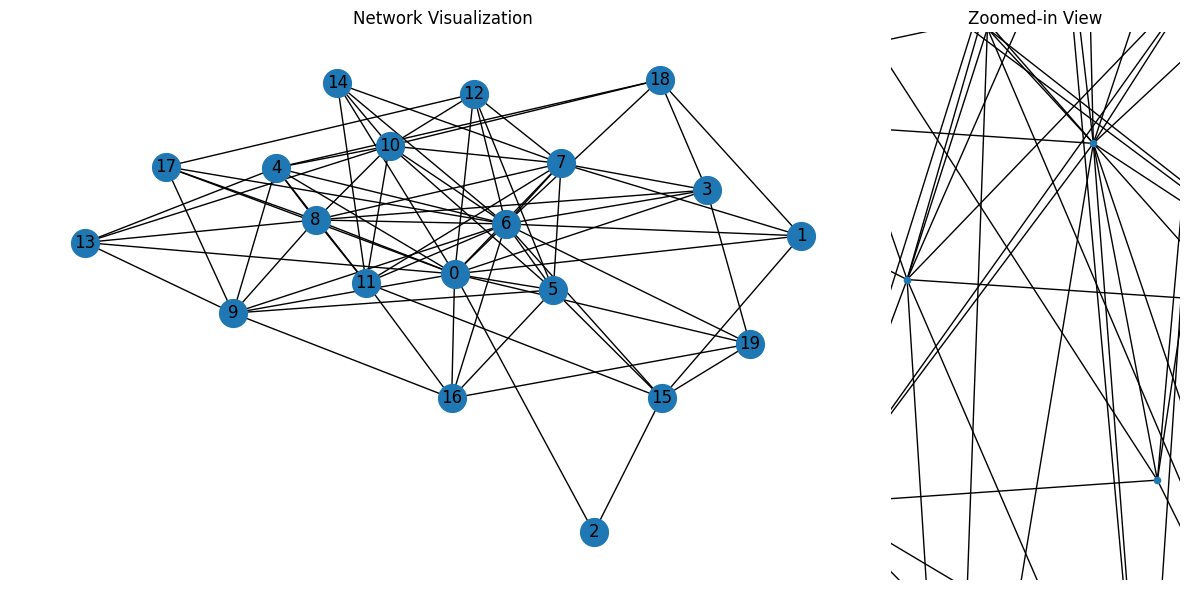

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Preferential attachment network generation
num_nodes = 20
m = 5
G = nx.barabasi_albert_graph(num_nodes, m)

# Degree distribution plot function (no change needed)
def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree (k)")
    plt.ylabel("Number of Nodes")
    plt.title("Degree Distribution")
    plt.loglog()
    plt.legend(['Degree Distribution'])
    plt.show()

# Plot both visualizations with a zoomed-in inset
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Main network visualization
nx.draw(G, with_labels=True, node_size=400, ax=axes[0])
axes[0].set_title("Network Visualization")

# Zoomed-in inset
pos = nx.spring_layout(G)  # Can use any layout if you prefer
xmin, xmax = axes[0].get_xlim()
ymin, ymax = axes[0].get_ylim()

center = ((xmin + xmax)/2, (ymin + ymax)/2)
width = (xmax - xmin) / 4
height = (ymax - ymin) / 4

axes[1].set_xlim(center[0] - width/2, center[0] + width/2)
axes[1].set_ylim(center[1] - height/2, center[1] + height/2)

nx.draw(G, pos=pos, with_labels=False, node_size=20, ax=axes[1])  # Smaller nodes for inset
axes[1].set_title('Zoomed-in View')

plt.tight_layout()  # Adjust spacing
plt.show()